grid of mod std vs obs std plots. horizontal = frequency band; vertical = variable

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
import pandas as pd
import commonfxns as cf, OAPBuoyData as OAP, mplRC, OAPBuoyComp as bc,viz, evalfxns as ev, \
    frequencyBands as fb
import netCDF4 as nc
import cftime
import datetime as dt
import cmocean
import gsw
#from sklearn.linear_model import TheilSenRegressor
import pickle
import os
import matplotlib as mpl
from IPython.display import Markdown, display, HTML
import astropy.timeseries as apt
from collections import OrderedDict
import warnings
from matplotlib.colors import ListedColormap

mplRC.paperRC2()

In [2]:
import matplotlib.ticker as mtick
mtick.AutoLocator.__init__ = lambda self: mtick.MaxNLocator.__init__(self,nbins='auto',steps=[1,2,2.5,3,4,5,10])

In [3]:
# need to add hplus
varlist=['tos','sos']#,'phos','spco2','o2os','l10chlos'] # need to add ,'hplus'
Tvec=[13,]
freq='monthly'

In [4]:
fb.bxfbase

'/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/CanESM5CanOE_1975_2022/bxfs/'

In [5]:
df=pd.read_csv('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/CanESM51_1975_2022_monthly/bxfs/'+f"bxf_df.{'_'.join([str(el) for el in Tvec])}.{freq}.csv")

In [6]:
dfb=OAP.loadOAPInfo(modelgrid=True)

In [7]:
dfb.keys()

Index(['datasetID', 'title', 'minTime', 'maxTime', 'Lat', 'Lon', 'tabfile',
       'jj', 'ii', 'Lat1x1', 'Lon1x1', 'jjHD', 'iiHD', 'modBathy',
       'modBathyHD', 'shortTitle'],
      dtype='object')

In [8]:
dfb.loc[dfb.datasetID=='pmel_co2_moorings_ba50_a09b_5565',['modBathy']].values[0][0]

1812.6241

In [9]:
df['modBathy']=[dfb.loc[dfb.datasetID==dsid,['modBathy']].values[0][0] for dsid in df.datasetID]

In [10]:
df

,Unnamed: 0,ivar,datasetID,var_1_13_obs,var_g13_obs,var_total_obs,vards_1_13_obs,vards_g13_obs,vards_total_obs,var_seas_obs,...,vards_total_mod_N,var_seas_mod_N,title,minTime,maxTime,Lat,Lon,tabfile,shortTitle,modBathy
0,0,tos,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576,12,Iceland NOAA Surface Ocean CO2 and Ocean Acid...,2013-08-16T10:47:00Z,2017-06-28T18:17:00Z,68.000,-12.670,ICELAND.txt,Iceland,1812.624146
1,1,tos,pmel_co2_moorings_c2e7_ecb9_4565,24.033627,0.660200,25.718666,0.545605,0.103446,0.740519,25.338698,...,576,12,Gulf of Maine NOAA Surface Ocean CO2 and Ocea...,2006-07-13T02:16:00Z,2021-06-02T09:17:00Z,43.023,-70.542,GULFOFMAINE.txt,Gulf of Maine,52.952694
2,2,tos,pmel_co2_moorings_c64b_e2bb_dc32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576,12,First Landing NOAA Surface Ocean CO2 and Ocea...,2018-04-05T21:17:00Z,2020-09-26T15:17:00Z,36.998,-76.088,FIRSTLANDING.txt,First Landing,21.984417
3,3,tos,pmel_co2_moorings_4e4c_1834_1204,8.225576,1.000825,9.773333,0.194231,0.051217,0.263856,8.818674,...,576,12,Hog Reef NOAA Surface Ocean CO2 and Ocean Aci...,2010-12-05T03:17:00Z,2018-07-31T12:16:00Z,32.460,-64.830,HOGREEF.txt,Hog Reef,4167.953613
4,4,tos,pmel_co2_moorings_e1ef_470f_1fee,11.098478,0.442511,12.172235,0.227893,0.024357,0.277580,11.220157,...,576,12,Crescent Reef NOAA Surface Ocean CO2 and Ocea...,2010-11-27T03:17:00Z,2015-07-07T15:17:00Z,32.400,-64.790,CRESCENTREEF.txt,Crescent Reef,4167.953613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,173,AOUos,pmel_co2_moorings_fad6_8193_8d89,1255.188600,475.907597,1985.331000,486.397523,146.261163,714.618611,1423.364849,...,576,12,Cha ba NOAA Surface Ocean CO2 and Ocean Acidi...,2010-07-16T20:17:00Z,2017-10-16T15:17:00Z,47.936,-125.958,CHABA.txt,Cha ba,1492.544678
174,174,AOUos,pmel_co2_moorings_ec3a_a5d3_70e4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576,12,KEO NOAA Surface Ocean CO2 and Ocean Acidific...,2007-09-26T10:07:00Z,2020-05-19T03:17:00Z,32.280,144.580,KEO.txt,KEO,5713.995605
175,175,AOUos,pmel_co2_moorings_9bc0_7e75_7ae7,21.650305,14.362520,51.310506,11.755776,12.805664,35.368890,14.466980,...,576,12,MOSEAN/WHOTS NOAA Surface Ocean CO2 and Ocean...,2004-12-19T23:55:00Z,2018-09-27T00:16:00Z,22.670,-157.980,WHOTS.txt,MOSEAN/WHOTS,4664.975098
176,176,AOUos,pmel_co2_moorings_c24f_d404_46d8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,576,12,Kaneohe NOAA Surface Ocean CO2 and Ocean Acid...,2011-09-30T03:17:00Z,2020-10-20T18:17:00Z,21.480,-157.780,KANEOHE.txt,Kaneohe,826.443665


In [11]:
df.keys()

Index(['Unnamed: 0', 'ivar', 'datasetID', 'var_1_13_obs', 'var_g13_obs',
       'var_total_obs', 'vards_1_13_obs', 'vards_g13_obs', 'vards_total_obs',
       'var_seas_obs', 'var_b_seas_obs', 'var_b_1_13_obs', 'var_b_g13_obs',
       'var_b_total_obs', 'vards_b_1_13_obs', 'vards_b_g13_obs',
       'vards_b_total_obs', 'var_1_13_mod', 'var_g13_mod', 'var_total_mod',
       'vards_1_13_mod', 'vards_g13_mod', 'vards_total_mod', 'var_seas_mod',
       'var_1_13_obs_N', 'var_g13_obs_N', 'var_total_obs_N',
       'vards_1_13_obs_N', 'vards_g13_obs_N', 'vards_total_obs_N',
       'var_seas_obs_N', 'var_b_seas_obs_N', 'var_b_1_13_obs_N',
       'var_b_g13_obs_N', 'var_b_total_obs_N', 'vards_b_1_13_obs_N',
       'vards_b_g13_obs_N', 'vards_b_total_obs_N', 'var_1_13_mod_N',
       'var_g13_mod_N', 'var_total_mod_N', 'vards_1_13_mod_N',
       'vards_g13_mod_N', 'vards_total_mod_N', 'var_seas_mod_N', 'title',
       'minTime', 'maxTime', 'Lat', 'Lon', 'tabfile', 'shortTitle',
       'modBathy'],

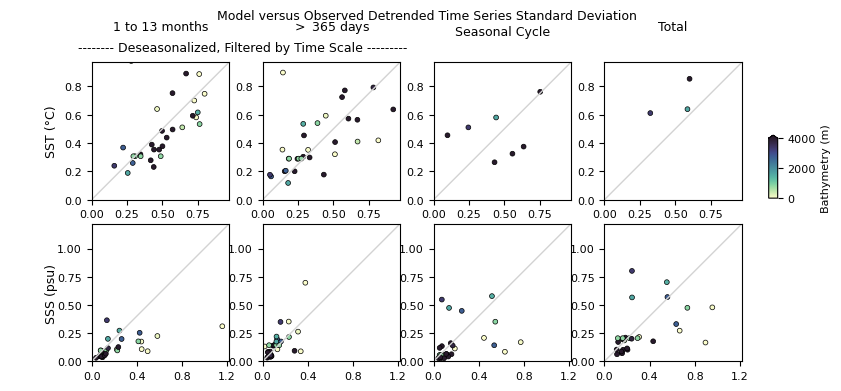

In [12]:
### Final ###
ms=12
mso=4
fs=9
cm2=cmocean.cm.deep
numcols=len(Tvec)+1+3
hratios=np.ones(len(varlist)+1); hratios[0]=.001
wratios=np.ones(numcols); wratios[0]=.1
fig,ax=plt.subplots(len(varlist)+1,numcols,figsize=(9,2.1*len(varlist)),
                    gridspec_kw=dict(width_ratios=wratios,height_ratios=hratios,wspace=.3,hspace=.25))
for jj,ivar in enumerate(varlist):
    axmax=0
    axmaxL=0
    for ii, group in enumerate([('vards_1_13_obs','vards_1_13_mod','vards_1_13_obs_N'),
                                ('vards_g13_obs','vards_g13_mod','vards_g13_obs_N'),
                                ('var_seas_obs','var_seas_mod','vards_g365_obs_N'),
                                ('var_total_obs','var_total_mod','var_total_obs_N')]):
        if ivar=='phos':
            ivar2='phosC'
            idf2=df.loc[df.ivar==ivar2]
            m2=ax[jj+1,ii+1].scatter(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),
                          c=idf2['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                    marker='s',edgecolors='k',linewidth=.5)
            # ax[jj+1,ii+1].plot(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),'s',
            #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
        idf=df.loc[df.ivar==ivar]
        m=ax[jj+1,ii+1].scatter(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),
                      c=idf['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                    marker='o',edgecolors='k',linewidth=.5)
        # ax[jj+1,ii+1].plot(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),'o',
        #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
        #ax[jj+1,ii+1].set_xlabel('Obs St. Dev.',fontsize=fs-2)
        #ax[jj+1,ii+1].set_ylabel('Model St. Dev.',fontsize=fs-2)
        if ii<2:
            axmax=max(axmax,np.max(np.sqrt(idf[group[0]])))
            if ivar=='phos':
                axmax2=max(axmax,np.max(np.sqrt(idf2[group[0]])))
                axmax=max(axmax,axmax2)
        else:
            axmaxL=max(axmaxL,np.max(np.sqrt(idf[group[0]])))
            if ivar=='phos':
                axmaxL2=max(axmaxL,np.max(np.sqrt(idf2[group[0]])))
                axmaxL=max(axmaxL,axmaxL2)
    for ii in range(0,len(Tvec)+3):
        axmaxi=axmax if ii<4 else axmaxL
        ax[jj+1,ii+1].axis([0,1.05*axmaxi,0,1.05*axmaxi])
        viz.squareax(ax[jj+1,ii+1])
    if ivar=='AOUos':
        strname='$\Delta$O$_2$ (μmol kg$^{-1}$)'
    elif ivar=='o2os':
        strname='Dissolved O$_2$\n(μmol kg$^{-1}$)'
    elif ivar=='spco2':
        strname='Surface Ocean\n pCO$_2$ (μatm)'
    elif ivar=='apco2':
        strname='Surface Air\n pCO$_2$ (μatm)'
    else:
        strname=bc.dispNameUnits[ivar]
    ax[jj+1,0].text(.5,.5,strname,ha='center',va='center',rotation='vertical',fontsize=fs)
    ax[jj+1,0].axis('off')
cbax=fig.add_axes([.93,.5,.01,.15])
cb=fig.colorbar(m,cax=cbax,extend='max',label='Bathymetry (m)')
ax[0,0].remove()
ax[0,1].set_title('1 to 13 months',fontsize=fs)
ax[0,1].axis('off')
ax[0,2].set_title('$>$ 365 days',fontsize=fs)
ax[0,2].axis('off')
ax[0,3].set_title('Seasonal Cycle',fontsize=fs,va='top')
ax[0,3].axis('off')
ax[0,4].set_title('Total',fontsize=fs)
ax[0,4].axis('off')
fig.suptitle("Model versus Observed Detrended Time Series Standard Deviation",
             y=.95,x=.55,fontsize=fs);
ax[0,1].annotate("-------- Deseasonalized, Filtered by Time Scale ---------",
                 [.27,.81],xycoords='figure fraction', 
                 ha='center',annotation_clip=False,fontsize=fs);

#ax.get_xaxis().set_visible(False) 
#ax.get_yaxis().set_visible(False)
#fig.suptitle(f"Variability: {labelStr[ii]}, Detrended {bc.dispNameUnits[ivar]}");
#         else:
#             fig.suptitle(f"Variability: {labelStr[ii]}, Detrended & Deseasonalized {bc.dispNameUnits[ivar]}");
#         for iax in ax:
#             viz.squareax(iax)
#             iax.set_ylabel('Model')
#             iax.set_xlabel('Observations')

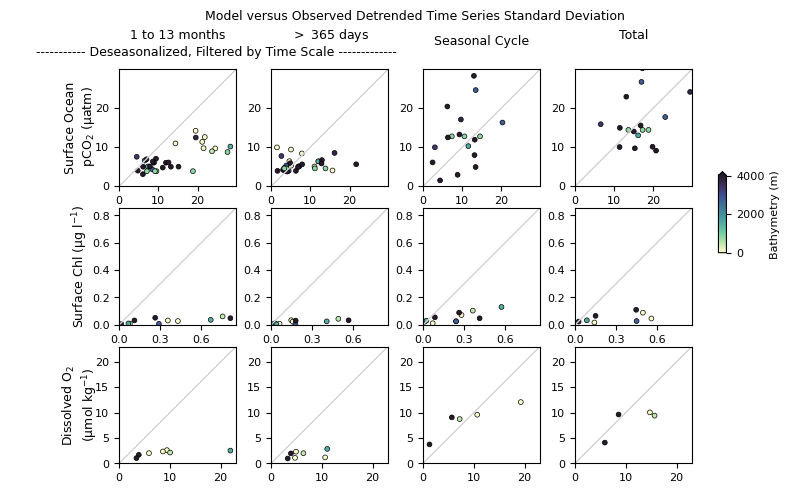

In [13]:
### Final ###
vl=['spco2','chlos','o2os']
ms=12
mso=4
fs=9
cm2=cmocean.cm.deep
numcols=len(Tvec)+1+3
hratios=np.ones(len(vl)+1); hratios[0]=.001
wratios=np.ones(numcols); wratios[0]=.1
fig,ax=plt.subplots(len(vl)+1,numcols,figsize=(8,2.7*len(varlist)),
                    gridspec_kw=dict(width_ratios=wratios,height_ratios=hratios,wspace=.3,hspace=.25))
for jj,ivar in enumerate(vl):
    axmax=0
    axmaxL=0
    for ii, group in enumerate([('vards_1_13_obs','vards_1_13_mod','vards_1_13_obs_N'),
                                ('vards_g13_obs','vards_g13_mod','vards_g13_obs_N'),
                                ('var_seas_obs','var_seas_mod','vards_g365_obs_N'),
                                ('var_total_obs','var_total_mod','var_total_obs_N')]):
        if ivar=='phos':
            ivar2='phosC'
            idf2=df.loc[df.ivar==ivar2]
            m2=ax[jj+1,ii+1].scatter(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),
                          c=idf2['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                    marker='s',edgecolors='k',linewidth=.5)
            # ax[jj+1,ii+1].plot(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),'s',
            #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
        idf=df.loc[df.ivar==ivar]
        m=ax[jj+1,ii+1].scatter(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),
                      c=idf['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                    marker='o',edgecolors='k',linewidth=.5)
        # ax[jj+1,ii+1].plot(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),'o',
        #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
        #ax[jj+1,ii+1].set_xlabel('Obs St. Dev.',fontsize=fs-2)
        #ax[jj+1,ii+1].set_ylabel('Model St. Dev.',fontsize=fs-2)
        if ii<2:
            axmax=max(axmax,np.max(np.sqrt(idf[group[0]])))
            if ivar=='phos':
                axmax2=max(axmax,np.max(np.sqrt(idf2[group[0]])))
                axmax=max(axmax,axmax2)
        else:
            axmaxL=max(axmaxL,np.max(np.sqrt(idf[group[0]])))
            if ivar=='phos':
                axmaxL2=max(axmaxL,np.max(np.sqrt(idf2[group[0]])))
                axmaxL=max(axmaxL,axmaxL2)
    for ii in range(0,len(Tvec)+3):
        axmaxi=axmax if ii<4 else axmaxL
        ax[jj+1,ii+1].axis([0,1.05*axmaxi,0,1.05*axmaxi])
        viz.squareax(ax[jj+1,ii+1])
    if ivar=='AOUos':
        strname='$\Delta$O$_2$ (μmol kg$^{-1}$)'
    elif ivar=='o2os':
        strname='Dissolved O$_2$\n(μmol kg$^{-1}$)'
    elif ivar=='spco2':
        strname='Surface Ocean\n pCO$_2$ (μatm)'
    elif ivar=='apco2':
        strname='Surface Air\n pCO$_2$ (μatm)'
    else:
        strname=bc.dispNameUnits[ivar]
    ax[jj+1,0].text(.5,.5,strname,ha='center',va='center',rotation='vertical',fontsize=fs)
    ax[jj+1,0].axis('off')
cbax=fig.add_axes([.93,.5,.01,.15])
cb=fig.colorbar(m,cax=cbax,extend='max',label='Bathymetry (m)')
ax[0,0].remove()
ax[0,1].set_title('1 to 13 months',fontsize=fs)
ax[0,1].axis('off')
ax[0,2].set_title('$>$ 365 days',fontsize=fs)
ax[0,2].axis('off')
ax[0,3].set_title('Seasonal Cycle',fontsize=fs,va='top')
ax[0,3].axis('off')
ax[0,4].set_title('Total',fontsize=fs)
ax[0,4].axis('off')
fig.suptitle("Model versus Observed Detrended Time Series Standard Deviation",
             y=.95,x=.55,fontsize=fs);
ax[0,1].annotate("----------- Deseasonalized, Filtered by Time Scale -------------",
                 [.27,.81],xycoords='figure fraction', 
                 ha='center',annotation_clip=False,fontsize=fs);

#ax.get_xaxis().set_visible(False) 
#ax.get_yaxis().set_visible(False)
#fig.suptitle(f"Variability: {labelStr[ii]}, Detrended {bc.dispNameUnits[ivar]}");
#         else:
#             fig.suptitle(f"Variability: {labelStr[ii]}, Detrended & Deseasonalized {bc.dispNameUnits[ivar]}");
#         for iax in ax:
#             viz.squareax(iax)
#             iax.set_ylabel('Model')
#             iax.set_xlabel('Observations')

Break up into 2 variable chunks

In [14]:
def makeplot2row(varlist):
    #T,S
    ms=12
    mso=4
    fs=10
    cm2=cmocean.cm.deep
    numcols=len(Tvec)+1+3
    hratios=np.ones(len(varlist))#; hratios[0]=.0001
    wratios=np.ones(numcols); wratios[0]=.1
    fig,ax=plt.subplots(len(varlist),numcols,figsize=(9,.25+1.7*len(varlist)),
                        gridspec_kw=dict(width_ratios=wratios,height_ratios=hratios,wspace=.33,hspace=.16))
    for jj,ivar in enumerate(varlist):
        axmax=0
        axmaxL=0
        if ivar in bc.varUncert.keys():
            unc=bc.varUncert[ivar]
        else:
            unc=np.nan
        for ii, group in enumerate([('vards_1_13_obs','vards_1_13_mod','vards_1_13_obs_N'),
                                ('vards_g13_obs','vards_g13_mod','vards_g13_obs_N'),
                                ('var_seas_obs','var_seas_mod','vards_g365_obs_N'),
                                ('var_total_obs','var_total_mod','var_total_obs_N')]):
            if ivar=='phos':
                ivar2='phosC'
                idf2=df.loc[(df.ivar==ivar2)&(~pd.isnull(df[group[0]]))&(~pd.isnull(df[group[1]]))]
                m2=ax[jj,ii+1].scatter(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),
                              c=idf2['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                        marker='s',edgecolors='k',linewidth=.5)
                # ax[jj+1,ii+1].plot(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),'s',
                #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
            idf=df.loc[(df.ivar==ivar)&(~pd.isnull(df[group[0]]))&(~pd.isnull(df[group[1]]))]
            m=ax[jj,ii+1].scatter(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),
                          c=idf['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                        marker='o',edgecolors='k',linewidth=.5)
            # ax[jj+1,ii+1].plot(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),'o',
            #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
            #ax[jj+1,ii+1].set_xlabel('Obs St. Dev.',fontsize=fs-2)
            #ax[jj+1,ii+1].set_ylabel('Model St. Dev.',fontsize=fs-2)
            if ii<4:
                axmax=np.max([axmax,np.max(np.sqrt(idf[group[0]])),np.max(np.sqrt(idf[group[1]]))])
                if ivar=='phos':
                    axmax2=np.max([axmax,np.max(np.sqrt(idf2[group[0]])),np.max(np.sqrt(idf2[group[1]]))])
                    axmax=max(axmax,axmax2)
            else:
                axmaxL=np.max([axmaxL,np.max(np.sqrt(idf[group[0]])),np.max(np.sqrt(idf[group[1]]))])
                if ivar=='phos':
                    axmaxL2=np.max([axmaxL,np.max(np.sqrt(idf2[group[0]])),np.max(np.sqrt(idf2[group[1]]))])
                    axmaxL=max(axmaxL,axmaxL2)
        for ii in range(0,len(Tvec)+3):
            axmaxi=axmax if ii<4 else axmaxL
            ax[jj,ii+1].axis([0,1.05*axmaxi,0,1.05*axmaxi])
            viz.squareax(ax[jj,ii+1])
            ax[jj,ii+1].axvline(unc,color='r',linestyle=':')
        if ivar=='AOUos':
            strname='$\Delta$O$_2$ (μmol kg$^{-1}$)'
        elif ivar=='o2os':
            strname='Dissolved O$_2$\n(μmol kg$^{-1}$)'
        elif ivar=='spco2':
            strname='Surface Ocean\n pCO$_2$ (μatm)'
        elif ivar=='apco2':
            strname='Surface Air\n pCO$_2$ (μatm)'
        else:
            strname=bc.dispNameUnits[ivar]
        ax[jj,0].text(.5,.5,strname,ha='center',va='center',rotation='vertical',fontsize=fs)
        ax[jj,0].axis('off')
    cbax=fig.add_axes([.92,.25,.01,.4])
    cb=fig.colorbar(m,cax=cbax,extend='max')
    cb.set_label('Bathymetry (m)',size=fs)
    #ax[0,0].remove()
    ax[0,1].set_title('1 to 7 days',fontsize=fs)
    #ax[0,1].axis('off')
    ax[0,2].set_title('7 to 31 days',fontsize=fs)
    #ax[0,2].axis('off')
    ax[0,3].set_title('31 to 365 days',fontsize=fs)
    #ax[0,3].axis('off')
    ax[0,4].set_title('$>$ 365 days',fontsize=fs)
    #ax[0,4].axis('off')
    ax[0,5].set_title('Seasonal Cycle',fontsize=fs,pad=6)
    #ax[0,5].axis('off')
    ax[0,6].set_title('Total',fontsize=fs)
    #ax[0,6].axis('off')
    fig.suptitle("Model versus Observed Time Series Standard Deviation",
                 y=1.01,x=.55,fontsize=fs);
    ax[0,1].annotate("-------------------------------------- Deseasonalized, Filtered by Time Scale --------------------------------------",
                     [.327,.91],xycoords='figure fraction', 
                     ha='center',annotation_clip=False,fontsize=fs);
    return fig,ax

In [15]:
def _num2str(bb,ivar):
    if ivar in ['phos']:
        return f"{bb:.3f}"
    elif ivar in ['sos','chlos']:
        return f"{bb:.2f}"
    elif ivar in ['tos','apco2']:
        return f"{bb:.1f}"
    elif ivar in ['spco2','o2os','AOUos']:
        return f"{bb:.0f}"
    else:
        return f"{bb:.3f}"
def makeplot3row(varlist):
    #T,S
    ms=12
    mso=4
    fs=10
    cm2=cmocean.cm.deep
    numcols=len(Tvec)+1+3
    hratios=np.ones(len(varlist))#; hratios[0]=.0001
    wratios=np.ones(numcols); wratios[0]=.1
    fig,ax=plt.subplots(len(varlist),numcols,figsize=(9,.5+1.75*len(varlist)),
                        gridspec_kw=dict(width_ratios=wratios,height_ratios=hratios,wspace=.33,hspace=.16))
    for jj,ivar in enumerate(varlist):
        axmax=0
        axmaxL=0
        if ivar in bc.varUncert.keys():
            unc=bc.varUncert[ivar]
        else:
            unc=np.nan
        for ii, group in enumerate([('vards_1_13_obs','vards_1_13_mod','vards_1_13_obs_N'),
                                ('vards_g13_obs','vards_g13_mod','vards_g13_obs_N'),
                                ('var_seas_obs','var_seas_mod','vards_g365_obs_N'),
                                ('var_total_obs','var_total_mod','var_total_obs_N')]):
            if ivar=='phos':
                ivar2='phosC'
                idf2=df.loc[(df.ivar==ivar2)&(~pd.isnull(df[group[0]]))&(~pd.isnull(df[group[1]]))]
                m2=ax[jj,ii+1].scatter(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),
                              c=idf2['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                        marker='s',edgecolors='k',linewidth=.5)
                # ax[jj+1,ii+1].plot(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),'s',
                #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
            idf=df.loc[(df.ivar==ivar)&(~pd.isnull(df[group[0]]))&(~pd.isnull(df[group[1]]))]
            m=ax[jj,ii+1].scatter(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),
                          c=idf['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                        marker='o',edgecolors='k',linewidth=.5)
            # ax[jj+1,ii+1].plot(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),'o',
            #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
            #ax[jj+1,ii+1].set_xlabel('Obs St. Dev.',fontsize=fs-2)
            #ax[jj+1,ii+1].set_ylabel('Model St. Dev.',fontsize=fs-2)
            if ii<2:
                axmax=np.max([axmax,np.max(np.sqrt(idf[group[0]])),np.max(np.sqrt(idf[group[1]]))])
                if ivar=='phos':
                    axmax2=np.max([axmax,np.max(np.sqrt(idf2[group[0]])),np.max(np.sqrt(idf2[group[1]]))])
                    axmax=max(axmax,axmax2)
            else:
                axmaxL=np.max([axmaxL,np.max(np.sqrt(idf[group[0]])),np.max(np.sqrt(idf[group[1]]))])
                if ivar=='phos':
                    axmaxL2=np.max([axmaxL,np.max(np.sqrt(idf2[group[0]])),np.max(np.sqrt(idf2[group[1]]))])
                    axmaxL=max(axmaxL,axmaxL2)
            if ivar=='phos':
                x=np.concatenate((np.sqrt(idf2[group[0]].values),np.sqrt(idf[group[0]].values)))
                y=np.concatenate((np.sqrt(idf2[group[1]].values),np.sqrt(idf[group[1]].values)))
            else:
                x=np.sqrt(idf[group[0]].values)
                y=np.sqrt(idf[group[1]].values)
            R=np.corrcoef(x,y)[1,0]
            bb=np.mean(y-x)
            ax[jj,ii+1].text(.015, .885, 'R$=$'+f"{R:.2f}", ha='left', va='top', 
                             transform=ax[jj,ii+1].transAxes)
            ax[jj,ii+1].text(.015, .985, 'bias$=$'+_num2str(bb,ivar), ha='left', va='top', 
                             transform=ax[jj,ii+1].transAxes)
        for ii in range(0,len(Tvec)+3):
            axmaxi=axmax if ii<2 else axmaxL
            ax[jj,ii+1].axis([0,1.05*axmaxi,0,1.05*axmaxi])
            viz.squareax(ax[jj,ii+1])
            ax[jj,ii+1].axvline(unc,color='r',linestyle=':')
        if ivar=='AOUos':
            strname='$\Delta$O$_2$ (μmol kg$^{-1}$)'
        elif ivar=='o2os':
            strname='Dissolved O$_2$\n(μmol kg$^{-1}$)'
        elif ivar=='spco2':
            strname='Surface Ocean\n pCO$_2$ (μatm)'
        elif ivar=='apco2':
            strname='Surface Air\n pCO$_2$ (μatm)'
        else:
            strname=bc.dispNameUnits[ivar]
        ax[jj,0].text(.5,.5,strname,ha='center',va='center',rotation='vertical',fontsize=fs)
        ax[jj,0].axis('off')
    cbax=fig.add_axes([.92,.25,.01,.4])
    cb=fig.colorbar(m,cax=cbax,extend='max')
    cb.set_label('Bathymetry (m)',size=fs)
    #ax[0,0].remove()
    ax[0,1].set_title('1 to 13 months',fontsize=fs)
    #ax[0,1].axis('off')
    ax[0,2].set_title('$>$ 13 months',fontsize=fs)
    #ax[0,4].axis('off')
    ax[0,3].set_title('Seasonal Cycle',fontsize=fs,pad=6)
    #ax[0,5].axis('off')
    ax[0,4].set_title('Total',fontsize=fs)
    #ax[0,6].axis('off')
    fig.suptitle("Model versus Observed Detrended Time Series Standard Deviation",
                 y=0.97,x=.55,fontsize=fs);
    ax[0,1].annotate("------------ Deseasonalized, Filtered by Time Scale ---------",
                     [.27,.86],xycoords='figure fraction', 
                     ha='center',annotation_clip=False,fontsize=fs);
    return fig,ax

/home/Elise.Olson/OAPMSE/paperFigs/bxf_spco2_o2os_AOUos_chlos_Rev


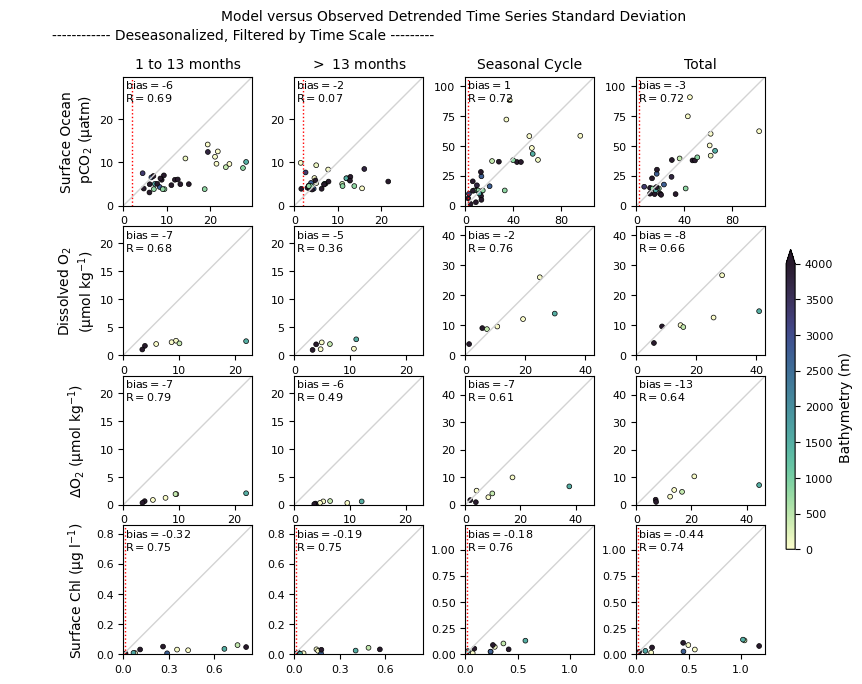

In [16]:
varlisti=['spco2','o2os','AOUos','chlos']
fig,ax=makeplot3row(varlisti)
fname=f'/home/Elise.Olson/OAPMSE/paperFigs/bxf_{"_".join(varlisti)}_Rev'
# fig.savefig(fname+'.pdf',dpi=400,bbox_inches='tight')
# fig.savefig(fname+'.tif',dpi=400,bbox_inches='tight')
print(fname)

In [17]:
def makeplot2rowWithSeas(varlist):
    #T,S
    ms=12
    mso=4
    fs=10
    cm2=cmocean.cm.deep
    numcols=len(Tvec)+1+3
    hratios=np.ones(len(varlist))#; hratios[0]=.0001
    wratios=np.ones(numcols); wratios[0]=.1
    fig,ax=plt.subplots(len(varlist),numcols,figsize=(13,.25+1.7*len(varlist)),
                        gridspec_kw=dict(width_ratios=wratios,height_ratios=hratios,wspace=.33,hspace=.16))
    for jj,ivar in enumerate(varlist):
        axmax=0
        axmaxL=0
        if ivar in bc.varUncert.keys():
            unc=bc.varUncert[ivar]
        else:
            unc=np.nan
        for ii, group in enumerate([('var_1_7_obs','var_1_7_mod','var_1_7_obs_N'),
                                    ('var_7_31_obs','var_7_31_mod','var_7_31_obs_N'),
                                    ('var_31_365_obs','var_31_365_mod','var_31_365_obs_N'),
                                    ('var_g365_obs','var_g365_mod','var_g365_obs_N'),
                                    ('var_seas_obs','var_seas_mod','var_g365_obs_N'),
                                    ('var_total_obs','var_total_mod','var_total_obs_N')]):
            if ivar=='phos':
                ivar2='phosC'
                idf2=df.loc[(df.ivar==ivar2)&(~pd.isnull(df[group[0]]))&(~pd.isnull(df[group[1]]))]
                m2=ax[jj,ii+1].scatter(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),
                              c=idf2['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                        marker='s',edgecolors='k',linewidth=.5)
                # ax[jj+1,ii+1].plot(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),'s',
                #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
            idf=df.loc[(df.ivar==ivar)&(~pd.isnull(df[group[0]]))&(~pd.isnull(df[group[1]]))]
            m=ax[jj,ii+1].scatter(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),
                          c=idf['modBathy'],s=ms,cmap=cm2,vmin=0,vmax=4000,
                                        marker='o',edgecolors='k',linewidth=.5)
            # ax[jj+1,ii+1].plot(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),'o',
            #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
            #ax[jj+1,ii+1].set_xlabel('Obs St. Dev.',fontsize=fs-2)
            #ax[jj+1,ii+1].set_ylabel('Model St. Dev.',fontsize=fs-2)
            if ii<4:
                axmax=np.max([axmax,np.max(np.sqrt(idf[group[0]])),np.max(np.sqrt(idf[group[1]]))])
                if ivar=='phos':
                    axmax2=np.max([axmax,np.max(np.sqrt(idf2[group[0]])),np.max(np.sqrt(idf2[group[1]]))])
                    axmax=max(axmax,axmax2)
            else:
                axmaxL=np.max([axmaxL,np.max(np.sqrt(idf[group[0]])),np.max(np.sqrt(idf[group[1]]))])
                if ivar=='phos':
                    axmaxL2=np.max([axmaxL,np.max(np.sqrt(idf2[group[0]])),np.max(np.sqrt(idf2[group[1]]))])
                    axmaxL=max(axmaxL,axmaxL2)
        for ii in range(0,len(Tvec)+3):
            axmaxi=axmax if ii<4 else axmaxL
            ax[jj,ii+1].axis([0,1.05*axmaxi,0,1.05*axmaxi])
            viz.squareax(ax[jj,ii+1])
            ax[jj,ii+1].axvline(unc,color='r',linestyle=':')
        if ivar=='AOUos':
            strname='$\Delta$O$_2$ (μmol kg$^{-1}$)'
        elif ivar=='o2os':
            strname='Dissolved O$_2$\n(μmol kg$^{-1}$)'
        elif ivar=='spco2':
            strname='Surface Ocean\n pCO$_2$ (μatm)'
        elif ivar=='apco2':
            strname='Surface Air\n pCO$_2$ (μatm)'
        else:
            strname=bc.dispNameUnits[ivar]
        ax[jj,0].text(.5,.5,strname,ha='center',va='center',rotation='vertical',fontsize=fs)
        ax[jj,0].axis('off')
    cbax=fig.add_axes([.92,.25,.01,.4])
    cb=fig.colorbar(m,cax=cbax,extend='max')
    cb.set_label('Bathymetry (m)',size=fs)
    #ax[0,0].remove()
    ax[0,1].set_title('1 to 7 days',fontsize=fs)
    #ax[0,1].axis('off')
    ax[0,2].set_title('7 to 31 days',fontsize=fs)
    #ax[0,2].axis('off')
    ax[0,3].set_title('31 to 365 days',fontsize=fs)
    #ax[0,3].axis('off')
    ax[0,4].set_title('$>$ 365 days',fontsize=fs)
    #ax[0,4].axis('off')
    ax[0,5].set_title('Seasonal Cycle',fontsize=fs,pad=6)
    #ax[0,5].axis('off')
    ax[0,6].set_title('Total',fontsize=fs)
    #ax[0,6].axis('off')
    fig.suptitle("Model versus Observed Detrended Time Series Standard Deviation",
                 y=1.01,x=.55,fontsize=fs);
    ax[0,1].annotate("-------------------------------------- Deseasonalized, Filtered by Time Scale --------------------------------------",
                     [.327,.91],xycoords='figure fraction', 
                     ha='center',annotation_clip=False,fontsize=fs);
    return fig,ax

In [18]:
pa='/work/ebo/calcs/buoyCompTS/presentday/comps/'
c_apco2=bc.loadMoorComp(OAP.getID('Maine'),'apco2',path=pa)
c_dryair=bc.loadMoorComp(OAP.getID('Maine'),'co2dryair',path=pa)
c_spco2=bc.loadMoorComp(OAP.getID('Maine'),'spco2',path=pa)

FileNotFoundError: [Errno 2] No such file or directory: '/work/ebo/calcs/buoyCompTS/presentday/comps/timeSeriesComp.pmel_co2_moorings_c2e7_ecb9_4565.apco2.daily.pkl'

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(10,3))
ax.plot(c_apco2.obs_tdt,c_apco2.obs_val,'k.',ms=6)
ax.plot(c_dryair.obs_tdt,c_dryair.obs_val,'c.',ms=4,alpha=.2)
ax.plot(c_spco2.obs_tdt,c_spco2.obs_val,'r.',ms=2)

In [ ]:
# look specifically at tropical pacific temperature, salinity

In [ ]:
np.unique(df.loc[(df.Lat>-5)&(df.Lat<5),['shortTitle']])

In [ ]:
def nlon(el):
    if hasattr(el,'__len__') and ~isinstance(el,str): # assume array-like
        return np.array([nlon(eli) for eli in np.squeeze(el)])
    if el>0:
        return el-360
    else:
        return el
def makeplot4row_TPacOnly(varlist):
    #T,S
    ms=12
    mso=4
    fs=10
    cm2=cmocean.cm.thermal
    numcols=len(Tvec)+1+3
    hratios=np.ones(len(varlist))#; hratios[0]=.0001
    wratios=np.ones(numcols); wratios[0]=.1
    fig,ax=plt.subplots(len(varlist),numcols,figsize=(13,.5+1.75*len(varlist)),
                        gridspec_kw=dict(width_ratios=wratios,height_ratios=hratios,wspace=.33,hspace=.16))
    for jj,ivar in enumerate(varlist):
        axmax=0
        axmaxL=0
        if ivar in bc.varUncert.keys():
            unc=bc.varUncert[ivar]
        else:
            unc=np.nan
        for ii, group in enumerate([('vards_1_7_obs','vards_1_7_mod','vards_1_7_obs_N'),
                                    ('vards_7_31_obs','vards_7_31_mod','vards_7_31_obs_N'),
                                    ('vards_31_365_obs','vards_31_365_mod','vards_31_365_obs_N'),
                                    ('vards_g365_obs','vards_g365_mod','vards_g365_obs_N'),
                                    ('var_seas_obs','var_seas_mod','vards_g365_obs_N'),
                                    ('var_total_obs','var_total_mod','var_total_obs_N')]):
            if ivar=='phos':
                ivar2='phosC'
                idf2=df.loc[(df.Lat>-5)&(df.Lat<5)&(df.ivar==ivar2)&(~pd.isnull(df[group[0]]))&(~pd.isnull(df[group[1]]))]
                if len(idf2)>0:
                    m2=ax[jj,ii+1].scatter(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),
                              c=nlon(idf2['Lon']),s=ms,cmap=cm2,vmin=-300,vmax=-100,
                                        marker='s',edgecolors='k',linewidth=.5)
                # ax[jj+1,ii+1].plot(np.sqrt(idf2[group[0]]),np.sqrt(idf2[group[1]]),'s',
                #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
            idf=df.loc[(df.Lat>-5)&(df.Lat<5)&(df.ivar==ivar)&(~pd.isnull(df[group[0]]))&(~pd.isnull(df[group[1]]))]
            if len(idf)>0:
                m=ax[jj,ii+1].scatter(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),
                          c=nlon(idf['Lon']),s=ms,cmap=cm2,vmin=-300,vmax=-100,
                                        marker='o',edgecolors='k',linewidth=.5)
            # ax[jj+1,ii+1].plot(np.sqrt(idf[group[0]]),np.sqrt(idf[group[1]]),'o',
            #            fillstyle='none',ms=mso,color='k',markeredgewidth=.5)
            #ax[jj+1,ii+1].set_xlabel('Obs St. Dev.',fontsize=fs-2)
            #ax[jj+1,ii+1].set_ylabel('Model St. Dev.',fontsize=fs-2)
            if ii<4:
                axmax=np.max([axmax,np.max(np.sqrt(idf[group[0]])),np.max(np.sqrt(idf[group[1]]))]) if len(idf)>0 else 0.0
                if ivar=='phos':
                    axmax2=np.max([axmax,np.max(np.sqrt(idf2[group[0]])),np.max(np.sqrt(idf2[group[1]]))]) if len(idf2)>0 else 0.0
                    axmax=max(axmax,axmax2)
            else:
                axmaxL=np.max([axmaxL,np.max(np.sqrt(idf[group[0]])),np.max(np.sqrt(idf[group[1]]))]) if len(idf)>0 else 0.0
                if ivar=='phos':
                    axmaxL2=np.max([axmaxL,np.max(np.sqrt(idf2[group[0]])),np.max(np.sqrt(idf2[group[1]]))]) if len(idf2)>0 else 0.0
                    axmaxL=max(axmaxL,axmaxL2)
        for ii in range(0,len(Tvec)+3):
            axmaxi=axmax if ii<4 else axmaxL
            ax[jj,ii+1].axis([0,1.05*axmaxi,0,1.05*axmaxi])
            viz.squareax(ax[jj,ii+1])
            ax[jj,ii+1].axvline(unc,color='r',linestyle=':')
        if ivar=='AOUos':
            strname='$\Delta$O$_2$ (μmol kg$^{-1}$)'
        elif ivar=='o2os':
            strname='Dissolved O$_2$\n(μmol kg$^{-1}$)'
        elif ivar=='spco2':
            strname='Surface Ocean\n pCO$_2$ (μatm)'
        elif ivar=='apco2':
            strname='Surface Air\n pCO$_2$ (μatm)'
        else:
            strname=bc.dispNameUnits[ivar]
        ax[jj,0].text(.5,.5,strname,ha='center',va='center',rotation='vertical',fontsize=fs)
        ax[jj,0].axis('off')
    cbax=fig.add_axes([.92,.25,.01,.4])
    cb=fig.colorbar(m,cax=cbax,extend='max')
    cb.set_label('Longitude (°E)',size=fs)
    #ax[0,0].remove()
    ax[0,1].set_title('1 to 7 days',fontsize=fs)
    #ax[0,1].axis('off')
    ax[0,2].set_title('7 to 31 days',fontsize=fs)
    #ax[0,2].axis('off')
    ax[0,3].set_title('31 to 365 days',fontsize=fs)
    #ax[0,3].axis('off')
    ax[0,4].set_title('$>$ 365 days',fontsize=fs)
    #ax[0,4].axis('off')
    ax[0,5].set_title('Seasonal Cycle',fontsize=fs,pad=6)
    #ax[0,5].axis('off')
    ax[0,6].set_title('Total',fontsize=fs)
    #ax[0,6].axis('off')
    fig.suptitle("Model versus Observed Detrended Time Series Standard Deviation: Equatorial Pacific",
                 y=0.95,x=.55,fontsize=fs);
    ax[0,1].annotate("-------------------------------------- Deseasonalized, Filtered by Time Scale --------------------------------------",
                     [.327,.845],xycoords='figure fraction', 
                     ha='center',annotation_clip=False,fontsize=fs);
    return fig,ax

In [ ]:
fig,ax=makeplot4row_TPacOnly(['tos','sos','spco2','phos'])